# Example of using InfoBax with different acquisition functions

This notebook provides an example of how InfoBax with various acquisition functions deals with estimating the shortest path between two vertices in grid-shaped graph. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import gpflow
import graph_initialization
from InfoBAX import procedure
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

gpflow.config.set_default_float(np.float64)

In [2]:
# Hyperparameters for GP
gp_params = {
    "var": 3,
    "l": 0.3,
    "noise": 0.01,
    "kernel": "Matern52"
}

kernels = {
    "SE": gpflow.kernels.SquaredExponential(variance=gp_params["var"], lengthscales=gp_params["l"]),
    "Matern32": gpflow.kernels.Matern32(variance=gp_params["var"], lengthscales=gp_params["l"]),
    "Matern52": gpflow.kernels.Matern52(variance=gp_params["var"], lengthscales=gp_params["l"])
}

# Initializing graph 
graph = graph_initialization.make_grid_2d()

# Alternitavely, you can use this code to create grid-shaped graph:
# graph = graph_initialization.graph_processing(make_grid = True)
# graph.create_graph()

# File path where you want to save image/images
file_path = f'images/'

The procedure object has this argumets (in due order):
 - budget (number of iterations of InfoBax), 
 - num_samples (number of samples from predictive distribution for Monte Carlo estimate),
 - start (vertex from where to start),
 - finish (the goal vertex),
 - graph,
 - gp_params (should include type of kernel from kernels dictionary and parameters of that kernel),
 - kernels (dictionary of kernels from gpflow library),
 - init = 1 (initial number of points in our dataset chosen randomly, better not to change it)

In [3]:
opt = procedure(140, 30, 380, 399, graph, gp_params, kernels, 1)

Now you can run the procedure with desired acquisition function from ['EIG', 'Random', 'Var']. Parameter ***is_example*** = True (default = False) is only for getting an image for a grid-shaped graph, ***one_image*** = True (default = False) is when you want to get the image from the last iteration of InfoBax, otherwise you get ***budget*** images that can be then visualized. All images will be saved in ***file_path*** with names *image_Bax_{iteration}*/*image_Bax depending* on parameter ***one_image***.

In [4]:
opt.run('EIG', is_example = True)

Finished iter i = 0
Finished iter i = 20
Finished iter i = 40
Finished iter i = 60
Finished iter i = 80
Finished iter i = 100
Finished iter i = 120


Run the cell below if parameter ***one_image*** = True

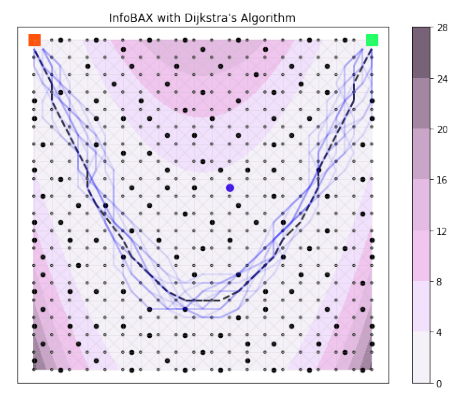

In [5]:
image = plt.imread(file_path + f'image_Bax.png')
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(image);

Run the cell below if parameter ***one_image*** = False (default)

In [6]:
def explore_result(step):
    image = plt.imread(file_path + f'image_Bax_{step}.png')
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image);
    return step

interact(explore_result, step = (0, opt.budget - 1))

interactive(children=(IntSlider(value=69, description='step', max=139), Output()), _dom_classes=('widget-inter…

<function __main__.explore_result(step)>